## Building Deep Neural Network

#### 1. Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from random import shuffle
import os, sys
import scipy
from scipy import ndimage
%matplotlib inline

#### Deep Neural Network Implementation Steps:
- Initialize the parameters for a L-layer neural network.

- Implement the forward propogation:   
    - Implement the linear part (weighted sum) of the L-layer forward propagation.  
    
    - Implement activation functions (relu/sigmoid).   
    
    - Combine the previous two steps into a new [Linear -> Activation] forward functions.   
    
    - Stack the [LINEAR->RELU] forward function L-1 time (for layers 1 through L-1) and add a [LINEAR->SIGMOID] at the end (for the final layer LL).
    
- Compute the loss.

- Implement the backward propagation:
    - Implement the linear part of the L-layer backward propagation.
    
    - Implement the gradient of the ACTIVATION function (relu_backward/sigmoid_backward).
    
    - Combine the previous two steps into a new [Linear -> Activation] backward functions.
    
    - Stack [LINEAR->RELU] backward L-1 times and add [LINEAR->SIGMOID] backward a L layer.

- Update the learned parameters.

### Initialization

In [2]:
def initialize_parameters_deep(layer_dims):
    """
    Parameters:
    layer_dims: python list
        Array (list) containing the dimension of each layer in the network
    Returns:
    paramters: dictionary
        Dictionary containing initialized parameters "W1", "b1",..."WL", "bL":
        W1 -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
        b1 -- bias vector of shape (layer_dims[l], layer_dims[l-1])
    """
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # no. of layers in the network
    
    for l in range(1, L):
        parameters["W" + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters["b" + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters["W" + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters["b" + str(l)].shape == (layer_dims[l], 1))
    
    return parameters

In [3]:
# Test Case
parameters = initialize_parameters_deep([5,4,3])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 0.01788628  0.0043651   0.00096497 -0.01863493 -0.00277388]
 [-0.00354759 -0.00082741 -0.00627001 -0.00043818 -0.00477218]
 [-0.01313865  0.00884622  0.00881318  0.01709573  0.00050034]
 [-0.00404677 -0.0054536  -0.01546477  0.00982367 -0.01101068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.01185047 -0.0020565   0.01486148  0.00236716]
 [-0.01023785 -0.00712993  0.00625245 -0.00160513]
 [-0.00768836 -0.00230031  0.00745056  0.01976111]]
b2 = [[ 0.]
 [ 0.]
 [ 0.]]


#### He Initialization


In [99]:
# 
def initialize_parameters_he(layers_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the size of each layer.
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    W1 -- weight matrix of shape (layers_dims[1], layers_dims[0])
                    b1 -- bias vector of shape (layers_dims[1], 1)
                    ...
                    WL -- weight matrix of shape (layers_dims[L], layers_dims[L-1])
                    bL -- bias vector of shape (layers_dims[L], 1)
    """
    
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims) - 1 # integer representing the number of layers
     
    for l in range(1, L + 1):
        ### START CODE HERE ### (≈ 2 lines of code)
        parameters['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l - 1]) * np.sqrt(2./layers_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layers_dims[l], 1))
        ### END CODE HERE ###
        
    return parameters

In [100]:
parameters = initialize_parameters_he([2, 4, 1])
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[ 0.]]


### Forward Propagation

#### a. Linear Forward

In [4]:
# linear forward
def linear_forward(A, W, b):
    """
    Parameters:
    A: numpy array
     Input data or activations from the previous layers of shape (size of previous layer, number of examples)
    W: numpy array
     weights matrix, numpy array of shape (size of the current layer, size of previous layer)
    b: numpy array
     bias vector, numpy array of shape (size of the current layer, 1)
    
    Returns:
    Z: numpy array
     Weighted sum - input for the activation function, numpy array of shape (size of current layer, number of examples)
    cache: python tuple
     A python tuple containing 'A', 'W' and 'b'; stored for computing the backward pass
    """
    Z = np.dot(W, A) + b
    #print("Shape of W "+ str(W.shape))
    #print("Shape of A "+ str(A.shape))
    #print("Shape of Z "+ str(Z.shape))

    
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    return Z, cache


In [78]:
#Test Case
def linear_forward_test_case():
    np.random.seed(1)
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = np.array([[1]])
    """
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    
    return A, W, b

A, W, b = linear_forward_test_case()

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295337 -1.23429987]]


#### b. Activation Functions

In [5]:
# sigmoid function
def sigmoid(Z):
    """
    Parameters:
    Z: numpy array
     Vector of weighted sum
    Returns:
    A: numpy array
     Vector of sigmoid activation values
    cache: numpy array
     Weighted sum (Z)     
    """
    A = 1./(1 + np.exp(-Z))
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

In [6]:
# relu function
def relu(Z):
    """
    Parameters:
    Z: numpy array
     Vector of weighted sum
    Returns:
    A: numpy array
     Vector of relu activation values
    cache: numpy array
     Weighted sum (Z)
    """
    A = np.maximum(0, Z)
    cache = Z
    assert(A.shape == Z.shape)
    return A, cache

#### c. Linear Activation Forward

In [7]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Parameters:
    A_prev: numpy array
     Input data or activations from the previous layers of shape (size of previous layer, number of examples)
    W: numpy array
     weights matrix, numpy array of shape (size of the current layer, size of previous layer)
    b: numpy array
     bias vector, numpy array of shape (size of the current layer, 1)
    activation: string
     The activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    A: numpy array
     Vector of activation values
    cache: python tuple
     A python tuple containing "linear_cache[(A, w, b)]" and "activation_cache[Z]"; stored for computing the backward pass
    
    """
    if activation == 'sigmoid':
        Z,linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
        
    elif activation == 'relu':
        Z,linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
        
    cache = (linear_cache, activation_cache)
    
    return A, cache

    

In [79]:
def linear_activation_forward_test_case():
    """
    X = np.array([[-1.02387576, 1.12397796],
 [-1.62328545, 0.64667545],
 [-1.74314104, -0.59664964]])
    W = np.array([[ 0.74505627, 1.97611078, -1.24412333]])
    b = 5
    """
    np.random.seed(2)
    A_prev = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    return A_prev, W, b

A_prev, W, b = linear_activation_forward_test_case()

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[ 0.96890023  0.11013289]]
With ReLU: A = [[ 3.43896131  0.        ]]


#### d. L-Layer Linear Forward Propagation
Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

In [8]:
def L_model_forward(X, parameters):
    """
    Parameters:
    X: numpy array
     Input data of shape (input size, number of examples)
    parameters: python dictionary
     dictionary containing values of initialized w and b - output of initialize_parameters_deep()
    
    Returns:
     AL: numpy array
      Last post-activation value
     caches: python list
       list of caches containing every cach of linear relu forward (from 1 to L-1 layers) and
       one linear sigmoid forward (layer L)   
    """
    caches = []
    A = X # input data
    L = len(parameters) // 2 # no. of layers in the neural network

    
    # [LINEAR->RELU]*(L-1)
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters["W" + str(l)], parameters["b" + str(l)], activation = "relu")
        caches.append(cache)
        
    #LINEAR -> SIGMOID (at layer L)
    AL, cache = linear_activation_forward(A, parameters["W" + str(L)], parameters["b" + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1, X.shape[1])) # final activation layer should have a shape of y which is (1, m)
    
    return AL, caches
    
    

In [84]:
def L_model_forward_test_case_2hidden():
    np.random.seed(6)
    X = np.random.randn(5,4)
    W1 = np.random.randn(4,5)
    b1 = np.random.randn(4,1)
    W2 = np.random.randn(3,4)
    b2 = np.random.randn(3,1)
    W3 = np.random.randn(1,3)
    b3 = np.random.randn(1,1)
  
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return X, parameters

X, parameters = L_model_forward_test_case_2hidden()

AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[ 0.03921668  0.70498921  0.19734387  0.04728177]]
Length of caches list = 3


#### e. Cost Function 
Logistic Cost Function: $$-\frac{1}{m} \sum\limits_{i = 1}^{m} (y^{(i)}\log\left(a^{[L] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right)) \tag{7}$$

In [85]:
def compute_cost(AL, Y):
    """
    Parameters:
    AL: numpy array
     Final Activation - Vector of predicted probabilities of the shape (1, number of examples)
    Y: numpy array
     "true" label vector of the shape (1, number of examples)
     
    Returns:
    cost: float
     cross-entropy costs
    """
    m = Y.shape[1] # no. of training examples
    
    cost = -(1./m) * (np.sum(Y * np.log(AL) + (1 - Y) * np.log( 1 - AL)))
    
    cost = np.squeeze(cost) # ensure the cost's shape remain intact (e.g this turns [[10]] into 10)
    assert(cost.shape == ())
    
    return cost
    
    

In [86]:
#Test Case
def compute_cost_test_case():
    Y = np.asarray([[1, 1, 1]])
    aL = np.array([[.8,.9,0.4]])
    
    return Y, aL
Y, AL = compute_cost_test_case()

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.414931599615


#### Compute Cost with Regularization

In [149]:
def compute_cost_with_regularization(AL, Y, parameters, lambd):
    """
    Parameters:
    AL: numpy array
     Final Activation - Vector of predicted probabilities of the shape (1, number of examples)
    Y: numpy array
     "true" label vector of the shape (1, number of examples)
    parameters: python dictionary
     python dictionary containing parameters of the model
    lambd: float
     Regularization hyper-parameter
     
    Returns:
    cost: float
     cross-entropy costs
    """
    L = len(parameters) // 2 # no. of layers in the neural network
    m = Y.shape[1] # no. of training examples
    
    cross_entropy_cost = compute_cost(AL, Y)
    
    L2_regularization_cost = 0.
    for l in range(1, L):
        L2_regularization_cost += (1/m)*(lambd/2)*(np.sum(np.square(parameters["W" + str(l)])))
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    cost = np.squeeze(cost) # ensure the cost's shape remain intact (e.g this turns [[10]] into 10)
    assert(cost.shape == ())
    
    return cost

### Backward Propagation

#### Linear Backward
Given $dZ^{[l]} = \frac{\partial \mathcal{L} }{\partial Z^{[l]}}$ is already calculated. In order to get $(dW^{[l]}, db^{[l]} dA^{[l-1]})$, the following formulas will be used:
$$ dW^{[l]} = \frac{\partial \mathcal{L} }{\partial W^{[l]}} = \frac{1}{m} dZ^{[l]} A^{[l-1] T} \tag{8}$$
$$ db^{[l]} = \frac{\partial \mathcal{L} }{\partial b^{[l]}} = \frac{1}{m} \sum_{i = 1}^{m} dZ^{[l](i)}\tag{9}$$
$$ dA^{[l-1]} = \frac{\partial \mathcal{L} }{\partial A^{[l-1]}} = W^{[l] T} dZ^{[l]} \tag{10}$$
Note:
$$ dZ^{[l]} = {A^{{[l]}} - y} \tag{11}$$
$$ dZ^{[l-1]} =  W^{[l] T} dZ^{[l]} g'(Z^{{[l-1]}})\tag{12} = dA^{[l-1]} g'(Z^{{[l-1]}})$$


In [150]:
def linear_backward(dZ, cache, lambd):
    """
    Parameters:
    dZ: numpy array
     Gradient of the cost w.r.t the linear output of current layer l
    cache: tuple
     tuple of values (A_prev, W, b) coming from the forward propagation in the current layer l
    
    Returns:
    dA_prev: numpy array
     Gradient of the cost w.r.t to the activation of the previous layer (l-1), same shape as A_prev
    dW: numpy array
     Gradient of the cost w.r.t to the W of the current layer l-1, same shape as W
    db: numpy array
     Gradient of the cost w.r.t to the b of the current layer l-1, same shape as b
     
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1./m) * np.dot(dZ, A_prev.T) + (lambd/m) * W # appended regluarization term
    db = (1./m) * np.sum(dZ, axis = 1, keepdims = True) # keepdims ensure the shape remains intact
    dA_prev = np.dot(W.T, dZ)
    
    assert(dA_prev.shape == A_prev.shape)
    assert(dW.shape == W.shape)
    assert(db.shape == b.shape)
    
    return dA_prev, dW, db

In [151]:
#Test Case
def linear_backward_test_case():
    """
    z, linear_cache = (np.array([[-0.8019545 ,  3.85763489]]), (np.array([[-1.02387576,  1.12397796],
       [-1.62328545,  0.64667545],
       [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), np.array([[1]]))
    """
    np.random.seed(1)
    dZ = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    linear_cache = (A, W, b)
    return dZ, linear_cache

dZ, linear_cache = linear_backward_test_case()

dA_prev, dW, db = linear_backward(dZ, linear_cache, 0.0)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[ 0.51822968 -0.19517421]
 [-0.40506361  0.15255393]
 [ 2.37496825 -0.89445391]]
dW = [[-0.10076895  1.40685096  1.64992505]]
db = [[ 0.50629448]]


#### Gradient of the activation functions

In [152]:
# Gradient of the sigmoid function
def sigmoid_backward(dA, cache):
    """
    Parameters: 
    dA: numpy array
     Post-activation gradient
    cache: numpy array
    'Z' stored in cache from forward activation
    Returns:
    dZ: numpy arra
     Gradient of the cost w.r.t Z
    """
    Z = cache
    s = 1./(1 + np.exp(-Z))
    dZ = dA * s * (1 - s)

    assert(dZ.shape == Z.shape)

    return dZ

In [153]:
# Gradient of the relu function
def relu_backward(dA, cache):
    """
    Parameters: 
    dA: numpy array
     Post-activation gradient
    cache: numpy array
    'Z' stored in cache from forward activation
    Returns:
    dZ: numpy arra
     Gradient of the cost w.r.t Z
    """
    Z = cache
    dZ = np.array(dA, copy = True) # just copy the content of dA
    # set Z to 0 when Z <=0
    dZ[Z <= 0] = 0

    assert(dZ.shape == Z.shape)

    return dZ

#### Linear Activation Backward

In [154]:
def linear_activation_backward(dA, cache, activation, lambd):
    """
    Parameters: 
    dA: numpy array
     Post-activation gradient
    cache: numpy array
    'Z' stored in tuple of values (linear_cache, activation_cache) from forward activation
    activation: string
     The activation to be used, stored as string: "sigmoid" or "relu"
     
    Returns:
    dA_prev: numpy array
     Gradient of the cost w.r.t to the activation of the previous layer (l-1), same shape as A_prev
    dW: numpy array
     Gradient of the cost w.r.t to the W of the current layer l-1, same shape as W
    db: numpy array
     Gradient of the cost w.r.t to the b of the current layer l-1, same shape as b        
    """
    linear_cache, activation_cache =  cache #linear_cache = (A_prev, W, b), activation_cache = Z
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, lambd)
    elif activation == 'sigmoid':
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache, lambd) 
        
    return dA_prev, dW, db

In [155]:
#Test Case
def linear_activation_backward_test_case():
    """
    aL, linear_activation_cache = (np.array([[ 3.1980455 ,  7.85763489]]), ((np.array([[-1.02387576,  1.12397796], [-1.62328545,  0.64667545], [-1.74314104, -0.59664964]]), np.array([[ 0.74505627,  1.97611078, -1.24412333]]), 5), np.array([[ 3.1980455 ,  7.85763489]])))
    """
    np.random.seed(2)
    dA = np.random.randn(1,2)
    A = np.random.randn(3,2)
    W = np.random.randn(1,3)
    b = np.random.randn(1,1)
    Z = np.random.randn(1,2)
    linear_cache = (A, W, b)
    activation_cache = Z
    linear_activation_cache = (linear_cache, activation_cache)
    
    return dA, linear_activation_cache

AL, linear_activation_cache = linear_activation_backward_test_case()

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "sigmoid", lambd = 0.0)
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

dA_prev, dW, db = linear_activation_backward(AL, linear_activation_cache, activation = "relu", lambd = 0.0)
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989  0.        ]
 [ 0.37883606  0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


#### L-Layer Backward Propagation
Implement backpropagation for the *[LINEAR->RELU] $\times$ (L-1) -> LINEAR -> SIGMOID* model.


In [156]:
def L_model_backward(AL, Y, caches, lambd = 0.7):
    """
    Parameters:
    AL: numpy array
     Probability vector, output of the forward propagation
    Y: numpy array
     Vector of "true" labels
    caches: python list
       List of caches containing every cach of linear relu forward (from 1 to L-1 layers) and
       one linear sigmoid forward (layer L)   
       
    Returns:
    grads: python dictionary
     A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...    
    """
    
    grads = {}
    L = len(caches) # no. of layers
    m = AL.shape[1] # no. of training examples
    Y = Y.reshape(AL.shape) # reshape Y to the shape of AL

    dAL = - (np.divide(Y, AL) - np.divide(1. - Y, 1. - AL)) # derivative of cost with respect to AL
    
    #Lth layer (SIGMOID->LINEAR) gradients
    current_cache = linear_activation_backward(dAL, caches[L-1], activation = 'sigmoid', lambd = lambd)
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = current_cache
    
    # L-1the layer to 1st layer (RELU->LINEAR) gradients
    for l in reversed(range(L-1)):       
        current_cache = linear_activation_backward(grads["dA"+ str(l + 2)], caches[l], activation = 'relu', lambd = lambd)
        dA_prev_temp, dW_temp, db_temp = current_cache
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
        
    return grads


    

In [157]:
#TEST CASE
def L_model_backward_test_case():
    """
    X = np.random.rand(3,2)
    Y = np.array([[1, 1]])
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747]]), 'b1': np.array([[ 0.]])}

    aL, caches = (np.array([[ 0.60298372,  0.87182628]]), [((np.array([[ 0.20445225,  0.87811744],
           [ 0.02738759,  0.67046751],
           [ 0.4173048 ,  0.55868983]]),
    np.array([[ 1.78862847,  0.43650985,  0.09649747]]),
    np.array([[ 0.]])),
   np.array([[ 0.41791293,  1.91720367]]))])
   """
    np.random.seed(3)
    AL = np.random.randn(1, 2)
    Y = np.array([[1, 0]])

    A1 = np.random.randn(4,2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    Z1 = np.random.randn(3,2)
    linear_cache_activation_1 = ((A1, W1, b1), Z1)

    A2 = np.random.randn(3,2)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    Z2 = np.random.randn(1,2)
    linear_cache_activation_2 = ((A2, W2, b2), Z2)

    caches = (linear_cache_activation_1, linear_cache_activation_2)

    return AL, Y, caches

def print_grads(grads):
    print ("dW1 = "+ str(grads["dW1"]))
    print ("db1 = "+ str(grads["db1"]))
    print ("dA1 = "+ str(grads["dA2"])) # this is done on purpose to be consistent with lecture where we normally start with A0
                                        # in this implementation we started with A1, hence we bump it up by 1. 

AL, Y_assess, caches = L_model_backward_test_case()
#print(caches)
grads = L_model_backward(AL, Y_assess, caches, 0.0)
print_grads(grads)

dW1 = [[ 0.41010002  0.07807203  0.13798444  0.10502167]
 [ 0.          0.          0.          0.        ]
 [ 0.05283652  0.01005865  0.01777766  0.0135308 ]]
db1 = [[-0.22007063]
 [ 0.        ]
 [-0.02835349]]
dA1 = [[ 0.12913162 -0.44014127]
 [-0.14175655  0.48317296]
 [ 0.01663708 -0.05670698]]


### Update Parameters
Update the parameters using gradient descent:
$$ W^{[l]} = W^{[l]} - \alpha \text{ } dW^{[l]} \tag{16}$$
$$ b^{[l]} = b^{[l]} - \alpha \text{ } db^{[l]} \tag{17}$$

where $\alpha$ is the learning rate. After computing the updated parameters, store them in the parameters dictionary. 

In [158]:
def update_parameters(parameters, grads, learning_rate):
    """
    Parameters:
    parameters: python dictionary
     Dictionary containing initialized parameters "W1", "b1",..."WL", "bL":
    grads: python dictionary
     A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...    
    learning_rate: float
     Learning rate alpha
    
    Returns: 
    parameters: python dictionary
     Dictionary containing updated parameters "W1", "b1",..."WL", "bL":  
    """
    L = len(parameters) //2 # no. of layers in the network
    
    # update the parameters
    for l in range(1, L):
        parameters["W" + str(l)] = parameters["W" + str(l)] - (learning_rate * grads["dW" + str(l)])
        parameters["b" + str(l)] = parameters["b" + str(l)] - (learning_rate * grads["db" + str(l)])
    
    return parameters
                                                                                     
                                                               

In [159]:
#TEST CASE
def update_parameters_test_case():
    """
    parameters = {'W1': np.array([[ 1.78862847,  0.43650985,  0.09649747],
        [-1.8634927 , -0.2773882 , -0.35475898],
        [-0.08274148, -0.62700068, -0.04381817],
        [-0.47721803, -1.31386475,  0.88462238]]),
 'W2': np.array([[ 0.88131804,  1.70957306,  0.05003364, -0.40467741],
        [-0.54535995, -1.54647732,  0.98236743, -1.10106763],
        [-1.18504653, -0.2056499 ,  1.48614836,  0.23671627]]),
 'W3': np.array([[-1.02378514, -0.7129932 ,  0.62524497],
        [-0.16051336, -0.76883635, -0.23003072]]),
 'b1': np.array([[ 0.],
        [ 0.],
        [ 0.],
        [ 0.]]),
 'b2': np.array([[ 0.],
        [ 0.],
        [ 0.]]),
 'b3': np.array([[ 0.],
        [ 0.]])}
    grads = {'dW1': np.array([[ 0.63070583,  0.66482653,  0.18308507],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ]]),
 'dW2': np.array([[ 1.62934255,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]]),
 'dW3': np.array([[-1.40260776,  0.        ,  0.        ]]),
 'da1': np.array([[ 0.70760786,  0.65063504],
        [ 0.17268975,  0.15878569],
        [ 0.03817582,  0.03510211]]),
 'da2': np.array([[ 0.39561478,  0.36376198],
        [ 0.7674101 ,  0.70562233],
        [ 0.0224596 ,  0.02065127],
        [-0.18165561, -0.16702967]]),
 'da3': np.array([[ 0.44888991,  0.41274769],
        [ 0.31261975,  0.28744927],
        [-0.27414557, -0.25207283]]),
 'db1': 0.75937676204411464,
 'db2': 0.86163759922811056,
 'db3': -0.84161956022334572}
    """
    np.random.seed(2)
    W1 = np.random.randn(3,4)
    b1 = np.random.randn(3,1)
    W2 = np.random.randn(1,3)
    b2 = np.random.randn(1,1)
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    np.random.seed(3)
    dW1 = np.random.randn(3,4)
    db1 = np.random.randn(3,1)
    dW2 = np.random.randn(1,3)
    db2 = np.random.randn(1,1)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return parameters, grads

parameters, grads = update_parameters_test_case()
parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.5961597  -0.0191305   1.17500122]]
b2 = [[-0.74787095]]


### Putting it all together - L-Layer Network

In [163]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost = False, lambd = 0.7):
    """
    X: numpy array
     Input data of shape (no. of examples, num_px * nump_px * 3)
    Y: numpy array
     Vector of "true" label, of shape (1, no. of examples)
    layers_dims: python list
     List containing the input size and size of each layer, of length (no. of layers + 1)
    learning_rate: float
     Learning rate of the gradient descent rule
    num_iterations: float
     Number of iterations of the optimization loop
    print_cost: boolean
     Print the costs of every 100 steps, if True
    
    Returns:
    parameters: python dictionary
     Learned/Updated parameters (W, b)
    """
    
    np.random.seed(1)
    costs = [] #keep track of costs
    
    #parameters = initialize_parameters_deep(layers_dims)
    parameters = initialize_parameters_he(layers_dims)
    
    #Gradient Descent Loop
    for i in range(0, num_iterations):
        # Forward Propagations
        AL, caches = L_model_forward(X, parameters)
        
        # Compute Cost
        cost = compute_cost_with_regularization(AL, Y, parameters, lambd)
        
        #Backward Propagation
        grads = L_model_backward(AL, Y, caches, lambd)
        
        #Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
        
        # print the cost every 100 steps
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i : %f"% (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    #plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning Rate = " + str(learning_rate))
    plt.show()
    
    return parameters

            
        
    

In [164]:
    #Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
def predict(X, Y, parameters):
        """
        Parameters:
        X: numpy array
         Input data of shape (no. of examples, num_px * nump_px * 3)
        Y: numpy array
         Vector of "true" labels, of shape (1, no. of examples)
        parameters: python dictionary
         Dictionary containing initialized parameters "W1", "b1",..."WL", "bL"
           
        Returns:
         predictions: numpy array
          Vector of predicted labels, of shape (1, no. of examples)

        """
    
        AL, caches = L_model_forward(X, parameters)
        predictions = np.where(AL > 0.5, 1, 0)
        #print accuracy
        print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')
        return predictions

### Using L-Layer Network to predict cats vs dogs

#### Import cats vs dogs data (source: kaggle)

In [27]:
# Rescale the image to a fixed size
def rescale_img(img, size):
    return img.resize(size, Image.ANTIALIAS)

# read the image as a numpy array
def img_to_array(img):
    return np.array(img,
                   np.uint8).reshape(img.size[1], img.size[0], 3)

# label the image based on its file name
def label_image(img):
    # filename has label appended before the extension e.g cat.0.jpg
    file_name = img.split('.')[-3]
    if file_name == 'cat':
        return [1, 0]
    else:
        return [0, 1]
    
# load the data
def load_dataset(path, kind, size):
    training_data = []        
    for f in os.listdir(path):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in ['.jpg']: continue
        img = Image.open(os.path.join(path, f))
        label = label_image(f)
        img = rescale_img(img, size)
        training_data.append([np.array(img), np.array(label)])
        img.close()
    shuffle(training_data)
    return training_data

path = "./data/train_sample"
X_orig = load_dataset(path, 'test', (64, 64))

#### Split the data into training and test sets

In [28]:
# Split the data into training and test set (98% - 2%)
X_orig_train = X_orig[:-120]
X_orig_test = X_orig[-120:]
# Extract training data and its corresponding label
X_train = np.array([i[0] for i in X_orig_train])
y_train = np.array([i[1][0] for i in X_orig_train]).reshape(-1, 1).T
# Extract test data and its corresponding label
X_test = np.array([i[0] for i in X_orig_test])
y_test = np.array([i[1][0] for i in X_orig_test]).reshape(-1, 1).T


print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(582, 64, 64, 3)
(1, 582)
(120, 64, 64, 3)
(1, 120)


#### Data Summary

In [29]:
training_size = X_train.shape[0]
image_size = X_train.shape[1]
training_data_shape = X_train.shape
test_size = X_test.shape[0]
test_data_shape = X_test.shape

print("Number of training examples: " + str(training_size))
print("Number of test examples: " + str(test_size))
print("Height/width of each image: " + str(image_size))
print("Shape of training set X: " + str(training_data_shape))
print("Shape of test set X: " + str(test_data_shape))
print("Shape of training set y: " + str(y_train.shape))
print("Shape of test set y: " + str(y_test.shape))

Number of training examples: 582
Number of test examples: 120
Height/width of each image: 64
Shape of training set X: (582, 64, 64, 3)
Shape of test set X: (120, 64, 64, 3)
Shape of training set y: (1, 582)
Shape of test set y: (1, 120)


#### Reshape the training and test data sets so that images are flatten into one single vector of the form (width $*$ height $*$ 3, 1)

In [30]:
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
print("Shape of flattened training set X: " + str(X_train_flatten.shape))
print("Shape of training set y: " + str(y_train.shape))
print("Shape of flattened test set X: " + str(X_test_flatten.shape))
print("Shape of test set y: " + str(y_test.shape))

Shape of flattened training set X: (12288, 582)
Shape of training set y: (1, 582)
Shape of flattened test set X: (12288, 120)
Shape of test set y: (1, 120)


#### Standardize the data

In [41]:
X_train_std = X_train_flatten/255.
X_test_std = X_test_flatten/255.

### Run the Neural Network

#### Setup network dimensions

In [102]:
# layers dimensions
layers_dims = [12288, 120, 20, 7, 5, 1] # 5-layer network

#### Execute the 5-layer neural network

Cost after iteration 0 : 0.883131
Cost after iteration 100 : 0.626556
Cost after iteration 200 : 0.608090
Cost after iteration 300 : 0.604219
Cost after iteration 400 : 0.598164
Cost after iteration 500 : 0.588377
Cost after iteration 600 : 0.558981
Cost after iteration 700 : 0.534731
Cost after iteration 800 : 0.512770
Cost after iteration 900 : 0.491938
Cost after iteration 1000 : 0.473561
Cost after iteration 1100 : 0.449151
Cost after iteration 1200 : 0.425542
Cost after iteration 1300 : 0.409994
Cost after iteration 1400 : 0.389102
Cost after iteration 1500 : 0.369609
Cost after iteration 1600 : 0.351413
Cost after iteration 1700 : 0.324613
Cost after iteration 1800 : 0.298208
Cost after iteration 1900 : 0.279271
Cost after iteration 2000 : 0.267366
Cost after iteration 2100 : 0.214865
Cost after iteration 2200 : 0.301929
Cost after iteration 2300 : 0.316683
Cost after iteration 2400 : 0.108377


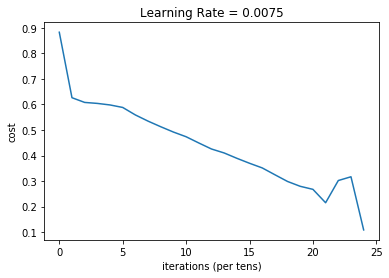

In [165]:
parameters = L_layer_model(X_train_std, y_train, layers_dims, learning_rate = 0.0075, num_iterations = 2500, print_cost = True, lambd = 0.7)

In [166]:
pred_train = predict(X_train_std, y_train, parameters)

Accuracy: 99%


In [167]:
pred_test = predict(X_test_std, y_test, parameters)

Accuracy: 57%


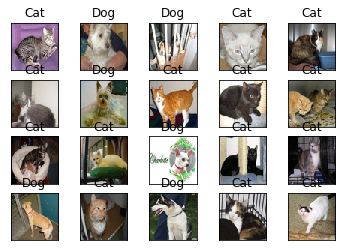

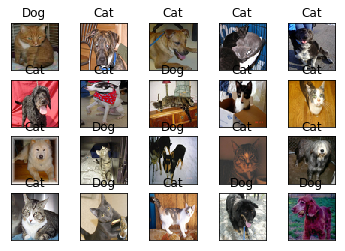

In [146]:
import scipy
from scipy import ndimage

def plot_labels(X, Y_Pred):
    """
    X: numpy array
     Input image
    Y_Pred: numpy array
     Vecotr of predicted labels
    """
    fig = plt.figure()
    for idx, item in enumerate(Y_Pred[0][:20]):
        y = fig.add_subplot(4, 5, idx + 1)
        #print(str(y_train[0][idx]) + "--" + str(pred_train[0][idx]))
        if(Y_Pred[0][idx] == 1): str_label = "Cat"
        else: str_label = "Dog"
            #imgs.append[X_test[i]]
            #print(predictions_test[0][i])
        y.imshow(X[idx],cmap='gray')
        plt.title(str_label)
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)   
    plt.show()

plot_labels(X_train, pred_train)
plot_labels(X_test, pred_test)